In [177]:
#!pip install category_encoders==2.*
#!pip install eli5
#!pip install pandas-profiling==2.*
#!pip install pdpbox
#!pip install shap
#!pip install xgboost

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv('complete-collection-of-kaggle-datasets/Kaggle Datasets.csv')
df['last_updated'] = pd.to_datetime(df['last_updated'], 
                                    infer_datetime_format=True)

In [180]:
print(df.shape)
df.head(3)

(18518, 16)


,ref,title,subtitle,creator,description,version,keywords,last_updated,license_name,size,size(bytes),downloads,discussions,views,likes,kernels
0,mlg-ulb/creditcardfraud,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,Context\n---------\n\nIt is important that cre...,3,"finance, machine learning, crime",2018-03-23 01:17:27,"Database: Open Database, Contents: Database Co...",66MB,69155632,131731,40,3052086,3323,2121
1,tmdb/tmdb-movie-metadata,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),### Background\nWhat can we say about the succ...,2,film,2017-09-28 01:09:12,Other (specified in description),9MB,9747156,92202,53,630515,1601,1462
2,hugomathien/soccer,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,The ultimate Soccer database for data analysis...,10,"europe, association football",2016-10-23 22:31:38,"Database: Open Database, Contents: © Original ...",34MB,36121187,80922,95,638231,1875,1458


In [181]:
# keywords is NOT separated
df['keywords'].value_counts().nsmallest(5)

image data, multiclass classification, agriculture                         1
internet, video games, computer science, mobile web                        1
economics, linguistics                                                     1
data visualization, time series, demographics, vehicles, mortality         1
image data, object detection, object recognition, object identification    1
Name: keywords, dtype: int64

In [182]:
# keywords has TONS of NaNs
df['keywords'].isna().sum()

12841

### Expoloring Cardinality of Non-Numeric Variables

In [183]:
df.describe(exclude='number')

,ref,title,subtitle,creator,description,keywords,last_updated,license_name,size
count,18518,18518,8012,18515,18518,5677,18518,18518,18518
unique,18518,17681,6836,10034,17739,2944,18508,26,2231
top,pramod722445/savenew16,Titanic,From New York State Open Data,State of New York,### Context\n\nThere's a story behind every da...,socrata,2019-02-14 20:22:27,Unknown,2MB
freq,1,48,230,230,113,637,4,8827,639
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-26 22:33:46,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-06 16:18:15,NaN,NaN


In [184]:
df.describe()

,version,size(bytes),downloads,discussions,views,likes,kernels
count,18518.000000,1.851800e+04,18518.000000,18518.000000,1.851800e+04,18518.000000,18518.000000
mean,5.460471,4.204281e+09,394.869424,0.287882,3.083455e+03,9.816233,6.004752
std,23.842488,4.230264e+11,2673.503306,1.705490,2.792698e+04,62.888877,56.726649
min,1.000000,2.200000e+01,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,1.000000,4.013425e+04,6.000000,0.000000,1.240000e+02,0.000000,1.000000
50%,1.000000,1.101386e+06,21.000000,0.000000,3.270000e+02,0.000000,1.000000
75%,1.000000,4.472701e+07,98.000000,0.000000,9.720000e+02,3.000000,2.000000
max,370.000000,5.736049e+13,131731.000000,95.000000,3.052086e+06,3323.000000,3810.000000


In [185]:
def checkCardinality(df):
    columns = df.describe(exclude='number').columns
    for col in columns:
        print(f"COLUMN: {col}")
        print(f"nUnique: {df[col].nunique()}")
        print(f"Perc Uniq: {df[col].nunique() / df.shape[0]}")
        print("TOP 5")
        print(df[col].value_counts().nlargest(5))
        print('\n')

In [186]:
checkCardinality(df.drop('description', axis=1))

COLUMN: ref
nUnique: 18518
Perc Uniq: 1.0
TOP 5
pramod722445/savenew16                       1
iluvmahheart/mla-punjab                      1
thomaskranzkowski/using-geodata-in-python    1
mithesh/melbournehousingdataset              1
ruddfawcett/hanzidb                          1
Name: ref, dtype: int64


COLUMN: title
nUnique: 17681
Perc Uniq: 0.9548007344205638
TOP 5
Titanic      48
dataset      38
titanic      18
train.csv    15
images       15
Name: title, dtype: int64


COLUMN: subtitle
nUnique: 6836
Perc Uniq: 0.369154336321417
TOP 5
From New York State Open Data     230
From New York City Open Data      175
From San Francisco Open Data       98
From City of Chicago Open Data     82
From City of Seattle Open Data     79
Name: subtitle, dtype: int64


COLUMN: creator
nUnique: 10034
Perc Uniq: 0.5418511718328113
TOP 5
State of New York        230
City of New York         191
City of San Francisco     98
mrkmakr                   96
Rachael Tatman            93
Name: creator, dtyp

In [187]:
df['creator'].value_counts().nlargest(15)

State of New York                               230
City of New York                                191
City of San Francisco                            98
mrkmakr                                          96
Rachael Tatman                                   93
pramod                                           92
NLTK Data                                        90
City of Chicago                                  87
FiveThirtyEight                                  85
City of Los Angeles                              83
City of Seattle                                  78
Centers for Medicare &amp; Medicaid Services     62
US Census Bureau                                 55
Kevin Mader                                      55
World Bank                                       55
Name: creator, dtype: int64

In [188]:
df['subtitle'].value_counts().nlargest(15)

From New York State Open Data                             230
From New York City Open Data                              175
From San Francisco Open Data                               98
From City of Chicago Open Data                             82
From City of Seattle Open Data                             79
From Los Angeles Open Data                                 78
Explore Data from FiveThirtyEight                          78
Explore open data from the CMS                             55
Explore open data from the city of Oakland                 49
Explore Time Series from the U.S. Census Bureau            46
Explore EU Data from the Joint Research Centre             40
Explore Open Data from the Centers for Disease Control     40
From World Bank Financial Open Data                        23
From World Bank Open Data                                  23
Explore EU Data from EU Parliament                         15
Name: subtitle, dtype: int64

In [189]:
df['keywords'].value_counts().nlargest(15)

socrata                                637
finance                                 75
image data                              63
internet                                60
economics                               54
europe                                  46
linguistics                             46
crime                                   42
nlp                                     41
politics                                41
video games                             39
sports                                  37
business                                32
world                                   31
machine learning, pre-trained model     29
Name: keywords, dtype: int64

In [190]:
df['license_name'].value_counts().nlargest(15)

Unknown                                                  8827
CC0: Public Domain                                       5200
Other (specified in description)                         1391
Data files © Original Authors                             880
Database: Open Database, Contents: Database Contents      536
CC BY-NC-SA 4.0                                           467
CC BY-SA 4.0                                              334
GPL 2                                                     290
Database: Open Database, Contents: © Original Authors     289
CC BY-SA 3.0                                              104
World Bank Dataset Terms of Use                            91
Reddit API Terms                                           27
U.S. Government Works                                      24
Attribution 4.0 International (CC BY 4.0)                  24
GNU Lesser General Public License 3.0                       5
Name: license_name, dtype: int64

In [191]:
# Phrases from top scoring description value_counts..
# largest value count is 113 5th larest is 10 after that i

phrase1 = 'This is a dataset hosted by'
kagDefaultDes = "There's a story behind every dataset and here's your opportunity to share yours."
kagDefaultDes2 = "Your data will be in front of the world's largest data science community. What questions do you want to see answered?"

### Data Cleaning

In [192]:
def lowstrip(series):
    series = series.str.lower()
    series = series.str.strip()
    return series

In [193]:
# TODOOOOOO

desDum = pd.DataFrame()

desDum['description_len'] = df['description'].str.len()
desDum['kag_deflt_des'] = df['description'].str.contains(pat=(kagDefaultDes or kagDefaultDes2), 
                                                              case=False)
print(desDum.shape)
desDum.head()

(18518, 2)


,description_len,kag_deflt_des
0,5060,False
1,5184,False
2,3918,False
3,909,False
4,2007,False


In [194]:
# 'subtitle'
df['subtitle'] = lowstrip(df['subtitle'])

#df['subtitle'].str.contains('open data')
#df['subtitle'].str.contains('explore')
#df['subtitle'].str.contains('http')
#df['subtitle'].str.contains('.com')
#df['subtitle'].str.len()
#df['subtitle'].isna()

sbtDum = pd.DataFrame()
sbtDum['sbt_cont_openData'] = df['subtitle'].str.contains('open data')
sbtDum['sbt_cont_explore'] = df['subtitle'].str.contains('explore')
sbtDum['sbt_cont_http'] = df['subtitle'].str.contains('http')
sbtDum['sbt_cont_.com'] = df['subtitle'].str.contains('.com')
sbtDum['len_subtitl'] = df['subtitle'].str.len()
sbtDum['no_subtitl'] = df['subtitle'].isna()
sbtDum['len_subtitl'] = sbtDum['len_subtitl'].fillna(0)
sbtDum = sbtDum.fillna('False')


print(sbtDum.shape)
sbtDum.head()

(18518, 6)


,sbt_cont_openData,sbt_cont_explore,sbt_cont_http,sbt_cont_.com,len_subtitl,no_subtitl
0,False,False,False,False,68.0,False
1,False,False,False,False,35.0,False
2,False,False,False,False,75.0,False
3,False,False,False,False,73.0,False
4,False,False,False,False,72.0,False


In [195]:
# creator

crDum = pd.DataFrame()
crDum['creator_State'] = df['creator'].str.contains('state', case=False)
crDum['creator_City'] = df['creator'].str.contains('city', case=False)
crDum['creator_mrkmakr'] = df['creator'] == 'mrkmakr'
crDum['creator_RachaelTatman'] = df['creator'] == 'Rachael Tatman'
crDum['creator_NLTK'] = df['creator'] == 'NLTK Data'
crDum['creator_538'] = df['creator'] == 'FiveThirtyEight'
crDum['creator_Centers'] = df['creator'].str.contains('centers', case=False)
crDum = crDum.fillna('False')

print(crDum.shape)
crDum.head()

(18518, 7)


,creator_State,creator_City,creator_mrkmakr,creator_RachaelTatman,creator_NLTK,creator_538,creator_Centers
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [196]:
# keywords
df['keywords'] = lowstrip(df['keywords'])
kw_separated = df['keywords'].str.split(', ', expand=True)
kw_separated = kw_separated.stack().dropna()

common_kw = kw_separated.value_counts().nlargest(50).index
common_kw

Index(['socrata', 'internet', 'image data', 'finance', 'linguistics',
       'business', 'economics', 'demographics', 'politics', 'nlp',
       'classification', 'sports', 'healthcare', 'text data', 'crime', 'world',
       'languages', 'deep learning', 'data visualization', 'time series',
       'machine learning', 'video games', 'education', 'health',
       'food and drink', 'multiclass classification', 'image processing',
       'united states', 'europe', 'india', 'government', 'geography',
       'twitter', 'beginner', 'pre-trained model', 'music', 'weather',
       'utility', 'text mining', 'brazil', 'cities', 'history', 'medicine',
       'countries', 'public health', 'association football',
       'artificial intelligence', 'regression analysis', 'environment', 'law'],
      dtype='object')

In [197]:
kwDum = pd.DataFrame()

for kw in common_kw:
    kwDum[f'kw_{kw}'] = df['keywords'].str.contains(kw)

kwDum['no_keywords'] = df['keywords'].isna()

kwDum = kwDum.fillna('False')

print(kwDum.shape)
kwDum.head()

(18518, 51)


,kw_socrata,kw_internet,kw_image data,kw_finance,kw_linguistics,kw_business,kw_economics,kw_demographics,kw_politics,kw_nlp,...,kw_history,kw_medicine,kw_countries,kw_public health,kw_association football,kw_artificial intelligence,kw_regression analysis,kw_environment,kw_law,no_keywords
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
# license_name
# I can One-Hot Encode These
assert df['license_name'].nunique() == 26

In [199]:
# size

df['size'].value_counts().nlargest(15)
sizeDum = pd.DataFrame()
sizeDum['size_MB'] = df['size'].str.contains('MB')
sizeDum['size_GB'] = df['size'].str.contains('GB')
sizeDum['size_KB'] = df['size'].str.contains('KB')

print(sizeDum.size)
sizeDum.head()

55554


,size_MB,size_GB,size_KB
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


### Assemble Final Dataframe

In [200]:
allUnique = ['ref', 'description', 'title']
highCardinality = ['subtitle', 'creator', 'keywords', 'size']
dummyCols = [sizeDum, kwDum, crDum, sbtDum, desDum]

In [201]:
df.head(2)

,ref,title,subtitle,creator,description,version,keywords,last_updated,license_name,size,size(bytes),downloads,discussions,views,likes,kernels
0,mlg-ulb/creditcardfraud,Credit Card Fraud Detection,anonymized credit card transactions labeled as...,Machine Learning Group - ULB,Context\n---------\n\nIt is important that cre...,3,"finance, machine learning, crime",2018-03-23 01:17:27,"Database: Open Database, Contents: Database Co...",66MB,69155632,131731,40,3052086,3323,2121
1,tmdb/tmdb-movie-metadata,TMDB 5000 Movie Dataset,"metadata on ~5,000 movies from tmdb",The Movie Database (TMDb),### Background\nWhat can we say about the succ...,2,film,2017-09-28 01:09:12,Other (specified in description),9MB,9747156,92202,53,630515,1601,1462


In [202]:
dfReg = df
dfReg = dfReg.drop(allUnique, axis=1)
dfReg = dfReg.drop('last_updated', axis=1)
dfReg = dfReg.drop(highCardinality, axis=1)

In [203]:
dummyDf = pd.concat(dummyCols, axis=1)

# Checks Before Concat
assert dummyDf.isna().sum().sum() == 0
assert dfReg.isna().sum().sum() == 0
assert dummyDf.shape[0] == dfReg.shape[0]

In [204]:
dfReg = pd.concat([dfReg, dummyDf], axis=1)

In [205]:
print(dfReg.shape)
dfReg.head(3)

(18518, 77)


,version,license_name,size(bytes),downloads,discussions,views,likes,kernels,size_MB,size_GB,...,creator_538,creator_Centers,sbt_cont_openData,sbt_cont_explore,sbt_cont_http,sbt_cont_.com,len_subtitl,no_subtitl,description_len,kag_deflt_des
0,3,"Database: Open Database, Contents: Database Co...",69155632,131731,40,3052086,3323,2121,True,False,...,False,False,False,False,False,False,68.0,False,5060,False
1,2,Other (specified in description),9747156,92202,53,630515,1601,1462,True,False,...,False,False,False,False,False,False,35.0,False,5184,False
2,10,"Database: Open Database, Contents: © Original ...",36121187,80922,95,638231,1875,1458,True,False,...,False,False,False,False,False,False,75.0,False,3918,False


### Fix Date Column

In [206]:
# May be a source of data leakage....

#delta = mostUpdated - df['last_updated']
#dfReg['days_since_updated'] = delta.dt.days

## Project Starts

In [207]:
# Establish Target

target = 'downloads'
possible_targets = ['discussions', 'views', 'likes', 'kernels']

dfDnld = dfReg
dfDnld = dfDnld.drop(possible_targets, axis=1)

dfLen = len(dfDnld[target])

In [208]:
print(f"Total NaNs: {dfDnld.isna().sum().sum()}")
print(f"Shape: {dfDnld.shape}")
dfDnld.head(2)

Total NaNs: 0
Shape: (18518, 73)


,version,license_name,size(bytes),downloads,size_MB,size_GB,size_KB,kw_socrata,kw_internet,kw_image data,...,creator_538,creator_Centers,sbt_cont_openData,sbt_cont_explore,sbt_cont_http,sbt_cont_.com,len_subtitl,no_subtitl,description_len,kag_deflt_des
0,3,"Database: Open Database, Contents: Database Co...",69155632,131731,True,False,False,False,False,False,...,False,False,False,False,False,False,68.0,False,5060,False
1,2,Other (specified in description),9747156,92202,True,False,False,False,False,False,...,False,False,False,False,False,False,35.0,False,5184,False


In [209]:
dfDnld.to_csv('kagDataSets.csv')

## Baseline

In [210]:
# Baseline Metric

targetMean = dfDnld[target].mean()
basePred = [targetMean] * dfLen
targetMean

394.86942434388163

In [211]:
from sklearn.metrics import mean_absolute_error
baseMAE = mean_absolute_error(dfDnld[target], basePred)
baseMAE

615.7832924629158

### Train-Val-Test Split

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    dfDnld.drop(columns=target),
                                    dfDnld[target],
                                    test_size=0.18,
                                    random_state=42
                                    )

In [213]:
X_valA, X_valB, y_valA, y_valB = train_test_split(
                                    X_train,
                                    y_train,
                                    test_size=0.01,
                                    random_state=42
                                    )

In [214]:
X_valA.head()

,version,license_name,size(bytes),size_MB,size_GB,size_KB,kw_socrata,kw_internet,kw_image data,kw_finance,...,creator_538,creator_Centers,sbt_cont_openData,sbt_cont_explore,sbt_cont_http,sbt_cont_.com,len_subtitl,no_subtitl,description_len,kag_deflt_des
13035,1,CC0: Public Domain,174,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0.0,True,157,False
2216,1,CC0: Public Domain,1548100,True,False,False,False,False,False,False,...,False,False,False,False,False,True,35.0,False,2352,False
16792,1,Unknown,1249329763,False,True,False,False,False,False,False,...,False,False,False,False,False,False,0.0,True,274,False
1438,1,Unknown,422002,False,False,True,False,False,False,False,...,False,False,False,False,False,False,52.0,False,1200,False
6785,2,World Bank Dataset Terms of Use,237091,False,False,True,False,False,False,False,...,False,False,False,False,False,False,0.0,True,230,False


In [215]:
assert len(X_train) + len(X_test) == len(df['downloads'])

In [216]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [217]:

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    XGBRegressor(n_estimators=50, objective='reg:squarederror', n_jobs=9)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k,
                        scoring='neg_mean_absolute_error')

print(f"XGBRegressor Mean MAE for {k} folds", -scores.mean())

XGBRegressor Mean MAE for 3 folds 518.1683310331331


In [218]:
imp = pipeline['xgbregressor'].feature_importances_

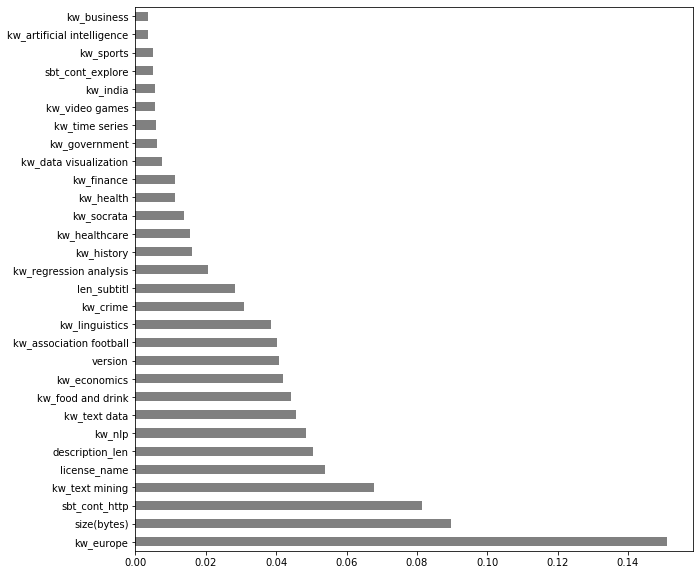

In [219]:
model = pipeline['xgbregressor']
encoder = pipeline['ordinalencoder']
enc_cols = encoder.transform(X_train).columns
fi = pd.Series(model.feature_importances_, enc_cols)
plt.figure(figsize=(10,10))
fi.sort_values().nlargest(30).plot.barh(color='grey');

In [220]:
maskZero = dfReg[target] == 0
maskZero.sum()

1671

In [221]:
maskTop = dfReg[target] >= 1000
maskTop.sum()

1100

In [222]:
topDnld = dfReg[maskTop]

## Linear Model

In [223]:
from sklearn.linear_model import Ridge

linear = make_pipeline(
    #ce.OneHotEncoder(use_cat_names=True),
    ce.OrdinalEncoder(),
    StandardScaler(),
    Ridge()
)
linear.fit(X_train, y_train)
y_pred_lin = linear.predict(X_train)

k = 5
scores_lin = cross_val_score(linear, X_train, y_train, cv=k,
                        scoring='neg_mean_absolute_error')

print(f"Ridge Mean MAE for {k} folds", -scores_lin.mean())

Ridge Mean MAE for 5 folds 579.4846059255289


In [224]:
coef = pd.Series(-linear['ridge'].coef_,
                 linear['ordinalencoder'].get_feature_names())
coef

version            -16.501510
license_name       -92.245181
size(bytes)          8.485140
size_MB            -91.295922
size_GB             -8.452697
                      ...    
sbt_cont_.com      104.585766
len_subtitl       -197.233248
no_subtitl         -25.282769
description_len   -265.115466
kag_deflt_des       35.242132
Length: 72, dtype: float64

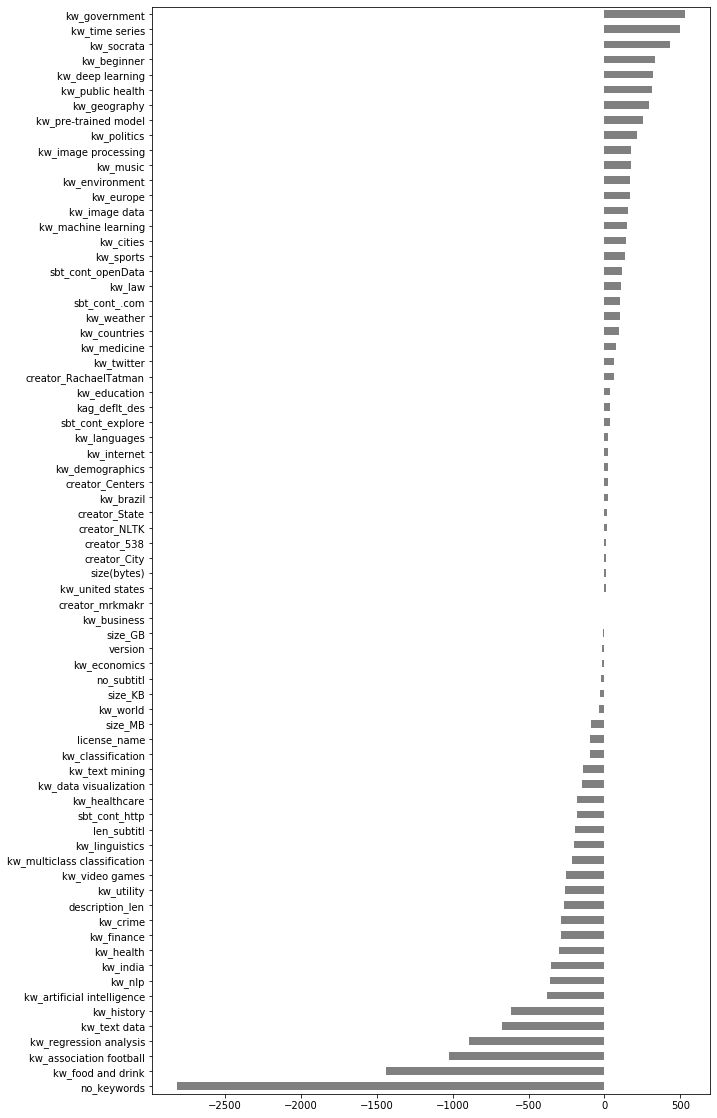

In [225]:
plt.figure(figsize=(10,20))
coef.sort_values().plot.barh(color='grey');

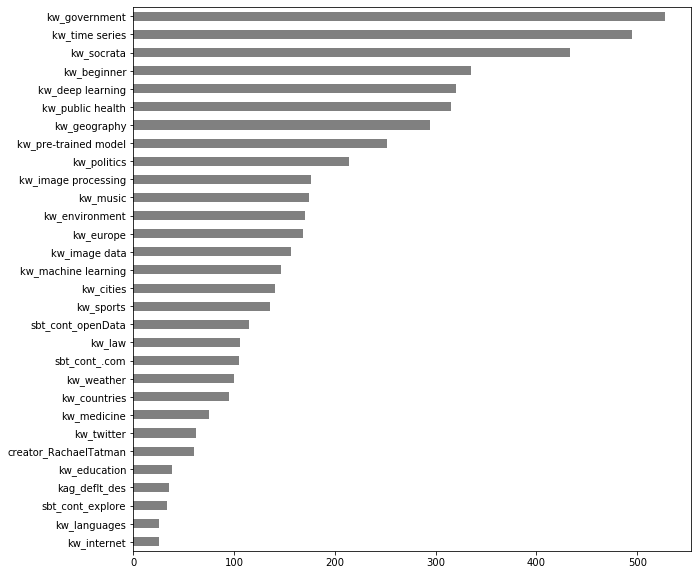

In [226]:
plt.figure(figsize=(10,10))
coef.nlargest(30).sort_values().plot.barh(color='grey');

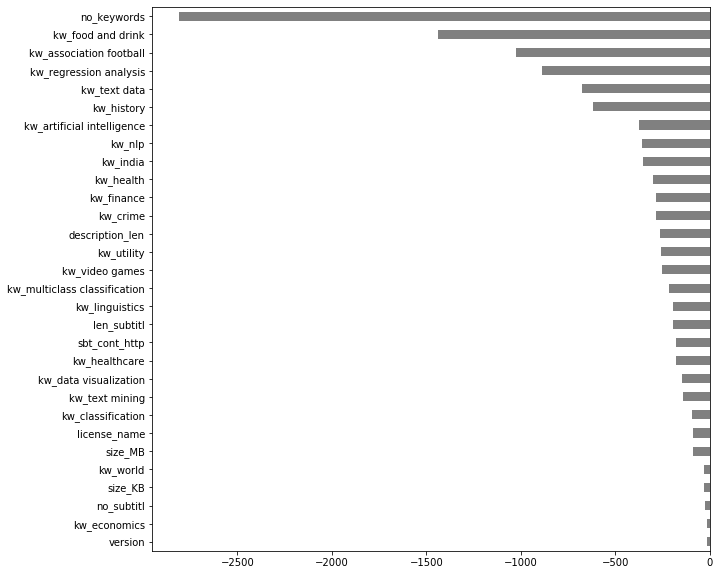

In [227]:
plt.figure(figsize=(10,10))
coef.nsmallest(30).sort_values(ascending=False).plot.barh(color='grey');

## Scrutinizing Model

In [228]:
dfReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18518 entries, 0 to 18517
Data columns (total 77 columns):
version                         18518 non-null int64
license_name                    18518 non-null object
size(bytes)                     18518 non-null int64
downloads                       18518 non-null int64
discussions                     18518 non-null int64
views                           18518 non-null int64
likes                           18518 non-null int64
kernels                         18518 non-null int64
size_MB                         18518 non-null bool
size_GB                         18518 non-null bool
size_KB                         18518 non-null bool
kw_socrata                      18518 non-null object
kw_internet                     18518 non-null object
kw_image data                   18518 non-null object
kw_finance                      18518 non-null object
kw_linguistics                  18518 non-null object
kw_business                     18518 no

In [229]:
k2dnld = pd.DataFrame({'no_keywords': dfReg['no_keywords'], 'dnlds': dfReg[target]})
#k2dnld.tail(50)

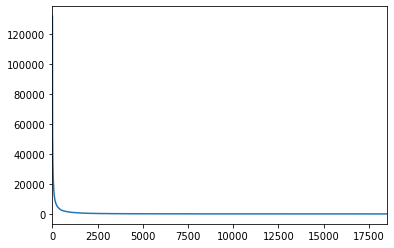

In [230]:
dfReg[target].plot()

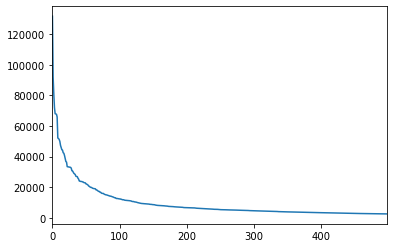

In [231]:
dfReg[target].nlargest(500).plot()

## Permutation Importance

In [232]:
import eli5

In [233]:
from eli5.sklearn import PermutationImportance

In [234]:
model = pipeline['xgbregressor']
encoder = pipeline['ordinalencoder']
reg_colNames = list(encoder.transform(X_valA).columns)

In [239]:
regModel = pipeline.fit(X_train, y_train)
X_val_encoded = pipeline['ordinalencoder'].transform(X_valA)
X_val_stnd = pipeline['standardscaler'].transform(X_val_encoded)
reg_colNames = list(pipeline['ordinalencoder'].get_feature_names())

In [236]:
perm = PermutationImportance(model,
                            random_state=42).fit(X_val_stnd, y_valA)

eli5.show_weights(perm, feature_names=reg_colNames)

Weight,Feature
0.2110 ± 0.0244,description_len
0.0571 ± 0.0039,kw_food and drink
0.0485 ± 0.0266,size(bytes)
0.0346 ± 0.0132,license_name
0.0282 ± 0.0281,kw_europe
0.0225 ± 0.0026,len_subtitl
0.0219 ± 0.0123,kw_text data
0.0192 ± 0.0022,version
0.0179 ± 0.0021,sbt_cont_http
0.0154 ± 0.0000,kw_crime


## Partial Dependence Plot

In [283]:
from sklearn.ensemble import RandomForestRegressor

randFor = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    RandomForestRegressor(n_estimators=50, n_jobs=9)
)
randFor.fit(X_train, y_train)
y_pred_rF = pipeline.predict(X_train)

k = 3
scores_rF = cross_val_score(randFor, X_train, y_train, cv=k,
                        scoring='neg_mean_absolute_error')

print(f"XGBRegressor Mean MAE for {k} folds", -scores_rF.mean())


XGBRegressor Mean MAE for 3 folds 544.227102040193


In [ ]:
regModel = pipeline.fit(X_train, y_train)
X_val_encoded = pipeline['ordinalencoder'].transform(X_valA)
X_val_stnd = pipeline['standardscaler'].transform(X_val_encoded)
reg_colNames = list(pipeline['ordinalencoder'].get_feature_names())

In [286]:
model_rF = randFor['randomforestregressor']
X_val_encoded_rF = randFor['ordinalencoder'].transform(X_valA)
X_val_stnd_rF = randFor['standardscaler'].transform(X_val_encoded)
reg_colNames_rF = list(encoder_rF.transform(X_valA).columns)
X_val_stnd__rF_df = pd.DataFrame(X_val_stnd_rF, columns=reg_colNames_rF)

In [248]:
from pdpbox import pdp, get_dataset, info_plots

In [279]:
#X_val_stnd_df = pd.DataFrame(X_val_stnd, columns=reg_colNames)
#X_val_stnd_df = pd.DataFrame(X_val_stnd)
#model_f = model_f

In [280]:
#reg_colNames
#model_f

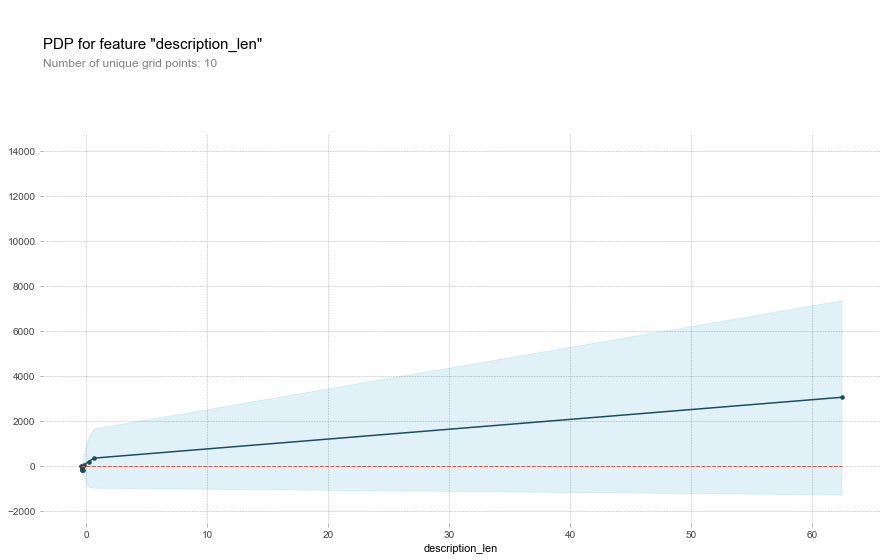

In [289]:
pdp_desLen = pdp.pdp_isolate(model=model_rF, 
                             dataset=X_val_stnd__rF_df,
                             model_features=reg_colNames_rF,
                             feature='description_len'
                            )

pdp.pdp_plot(pdp_desLen, 'description_len')
plt.show()

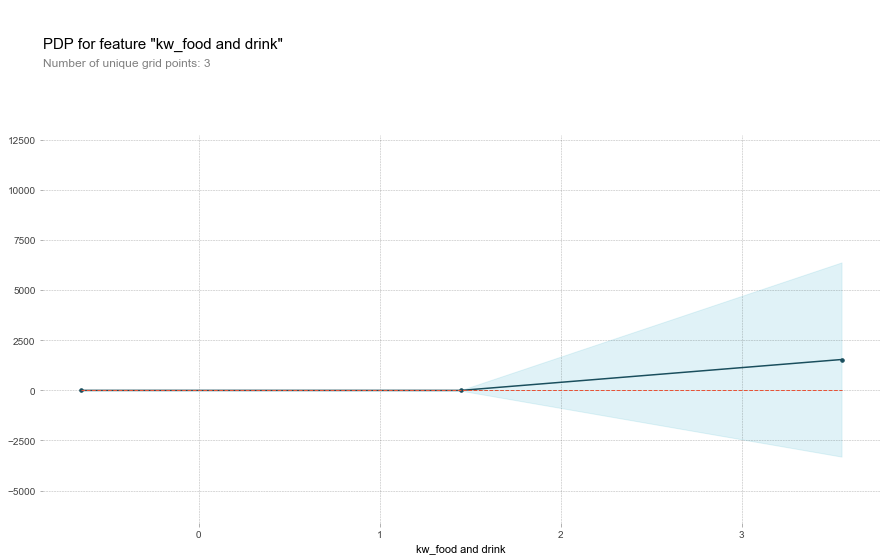

In [290]:
pdp_desLen = pdp.pdp_isolate(model=model_rF, 
                             dataset=X_val_stnd__rF_df,
                             model_features=reg_colNames_rF,
                             feature='kw_food and drink'
                            )

pdp.pdp_plot(pdp_desLen, 'kw_food and drink')
plt.show()

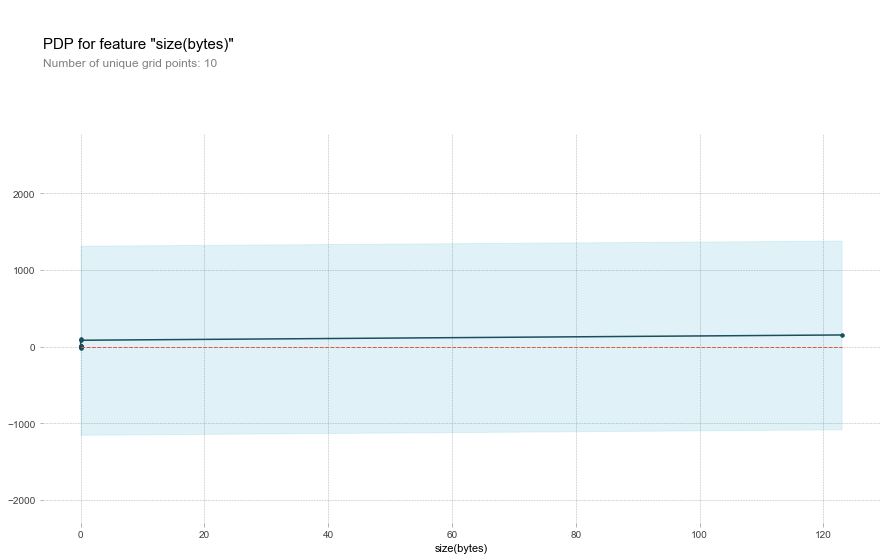

In [291]:
pdp_desLen = pdp.pdp_isolate(model=model_rF, 
                             dataset=X_val_stnd__rF_df,
                             model_features=reg_colNames_rF,
                             feature='size(bytes)'
                            )

pdp.pdp_plot(pdp_desLen, 'size(bytes)')
plt.show()

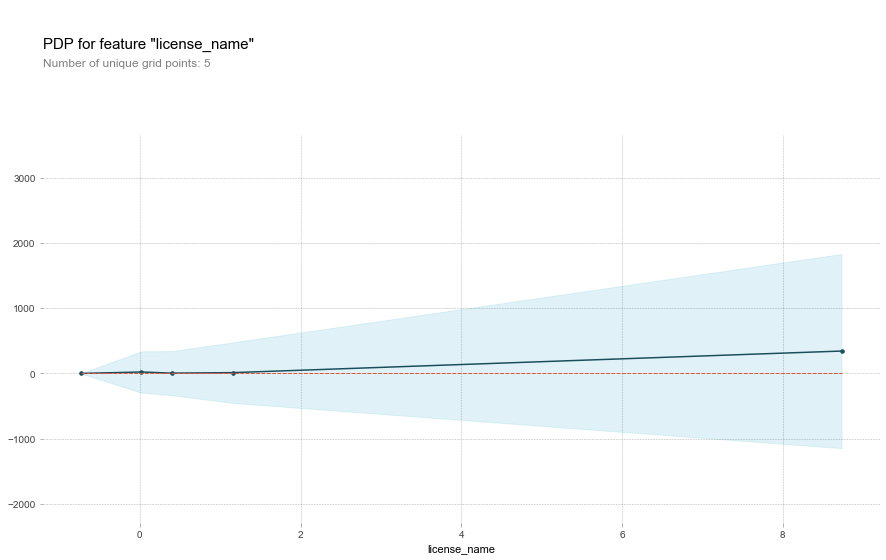

In [292]:
pdp_desLen = pdp.pdp_isolate(model=model_rF, 
                             dataset=X_val_stnd__rF_df,
                             model_features=reg_colNames_rF,
                             feature='license_name'
                            )

pdp.pdp_plot(pdp_desLen, 'license_name')
plt.show()

In [304]:
X_val_stnd__rF_df['license_name'].value_counts().nlargest(26)

-0.735050    7202
 0.022116    4178
 0.779281    1135
 1.157863     716
 1.536446     432
 2.672194     391
 0.400698     269
 2.293611     236
 1.915029     224
-0.356467      83
 3.050777      75
 4.186525      22
 6.458020      21
 4.565107      20
 7.972351       4
 5.700855       3
 6.836603       3
 8.350933       3
 3.429359       2
 4.943690       2
 7.593768       2
 7.215186       2
 3.807942       2
 6.079438       2
 5.322272       2
 8.729516       1
Name: license_name, dtype: int64

In [306]:
dfDnld['license_name'].value_counts().nlargest(26)

Unknown                                                                        8827
CC0: Public Domain                                                             5200
Other (specified in description)                                               1391
Data files © Original Authors                                                   880
Database: Open Database, Contents: Database Contents                            536
CC BY-NC-SA 4.0                                                                 467
CC BY-SA 4.0                                                                    334
GPL 2                                                                           290
Database: Open Database, Contents: © Original Authors                           289
CC BY-SA 3.0                                                                    104
World Bank Dataset Terms of Use                                                  91
Reddit API Terms                                                            